In [1]:
import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.exceptions import UndefinedMetricWarning
import warnings

In [2]:
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
np.random.seed(0)   # 保持每次生成的数据相同

c1 = 990
c2 = 10
N = c1 + c2
x_c1 = 3*np.random.randn(c1, 2)
x_c2 = 0.5*np.random.randn(c2, 2) + (4, 4)
x = np.vstack((x_c1, x_c2))
y = np.ones(N)
y[:c1] = -1

# 显示大小
s = np.ones(N) * 30
s[:c1] = 10

# 分类器
clfs = [svm.SVC(C=1, kernel='linear'),
       svm.SVC(C=1, kernel='linear', class_weight={-1: 1, 1: 50}),
       svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 2}),
       svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 10})]  # 红色样本其实是局部占优的，它的样本权值其实不用调到99



In [3]:
# 分类器
clfs = [svm.SVC(C=1, kernel='linear'),
       svm.SVC(C=1, kernel='linear', class_weight={-1: 1, 1: 50}),
       svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 2}),
       svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 10})]  # 红色样本其实是局部占优的，它的样本权值其实不用调到99


1 次：
accuracy：	 0.99
precision：	 0.0
recall：	 0.0
F1-score：	 0.0


/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


2 次：
accuracy：	 0.94
precision：	 0.14285714285714285
recall：	 1.0
F1-score：	 0.25


/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


3 次：
accuracy：	 0.994
precision：	 0.625
recall：	 1.0
F1-score：	 0.7692307692307693


/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


4 次：
accuracy：	 0.994
precision：	 0.625
recall：	 1.0
F1-score：	 0.7692307692307693


/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


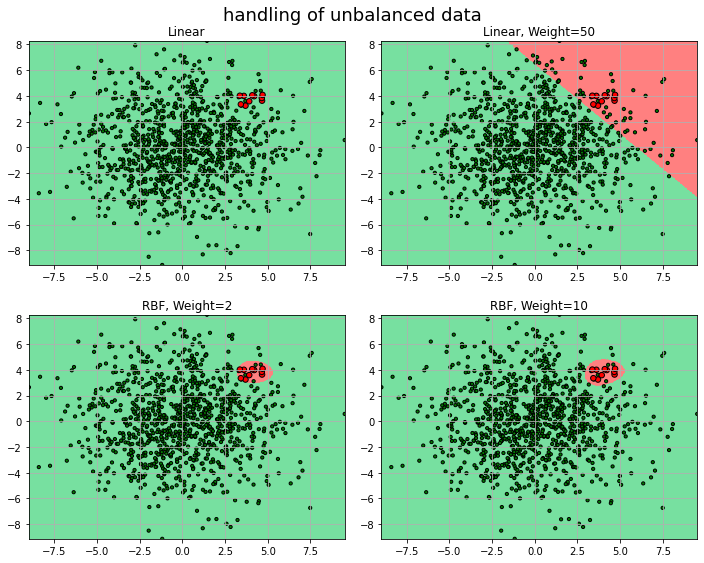

In [4]:
titles = 'Linear', 'Linear, Weight=50', 'RBF, Weight=2', 'RBF, Weight=10'

x1_min, x2_min = np.min(x, axis=0)
x1_max, x2_max = np.max(x, axis=0)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])

plt.figure(figsize=(10, 8), facecolor='w')
for i, clf in enumerate(clfs):
    clf.fit(x, y)
    y_hat = clf.predict(x)
    # show_accuracy(y_hat, y) # 正确率
    # show_recall(y, y_hat)   # 召回率
    print(i+1, '次：')
    print('accuracy：\t', accuracy_score(y, y_hat))
    print('precision：\t', precision_score(y, y_hat, pos_label=1))
    print('recall：\t', recall_score(y, y_hat, pos_label=1))
    print('F1-score：\t', f1_score(y, y_hat, pos_label=1))


    # 画图
    plt.subplot(2, 2, i+1)
    grid_hat = clf.predict(grid_test)       # 预测分类值
    grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=s, cmap=cm_dark)      # 样本的显示
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(titles[i])
    plt.grid()
plt.suptitle('handling of unbalanced data', fontsize=18)
plt.tight_layout(1.5)
plt.subplots_adjust(top=0.92)
plt.show()